# 1. Data Generator

In [1]:
import pandas as pd
import numpy as np
import math

RANDOM_STATE = 147369
np.random.seed(RANDOM_STATE)

# Stage 1

### Load data

In [2]:
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')
df_gym.shape[0]

973

In [3]:
df_gym['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

We are left with the cardio sessions alone, because that is our use case. We are left with 255 cardio sessions.

In [4]:
df_gym = df_gym[df_gym['Workout_Type'] == 'Cardio'].reset_index(drop=True)
df_gym.shape[0]

255

In [5]:
df_gym['Workout_Type'].unique()

array(['Cardio'], dtype=object)

In [6]:
df_hr = pd.read_csv('data/heart_rate.csv')

In [7]:
df_final_normal_group = pd.DataFrame()

for i in range(1, 12):
    file_name = f'data/normal_heart_rates/N{i}'
    df_aux = pd.read_csv(file_name, sep=r'\s+', header=None)
    df_aux.columns = ['Timestamp', 'Heart_rates']
    
    df_final_normal_group[f'Heart_rates_{i}'] = df_aux['Heart_rates']

In [8]:
df_final_normal_group

,Heart_rates_1,Heart_rates_2,Heart_rates_3,Heart_rates_4,Heart_rates_5,Heart_rates_6,Heart_rates_7,Heart_rates_8,Heart_rates_9,Heart_rates_10,Heart_rates_11
0,61.4125,63.4921,51.5464,82.5309,54.4465,65.0759,66.2252,76.0456,96.0000,85.3485,48.8998
1,59.0551,63.9659,60.4839,79.1557,54.4465,65.0759,63.9659,74.5342,98.5222,83.4492,51.9031
2,63.4921,65.0759,55.6586,75.2823,47.3934,60.0000,69.2042,78.3290,101.0100,83.4492,47.3934
3,63.4921,63.9659,58.6510,71.0900,44.1501,60.0000,66.8151,80.0000,101.0100,84.3882,45.4545
4,60.9756,63.4921,67.3401,79.1557,49.8753,64.5161,66.8151,78.3290,102.3890,83.4492,48.8998
...,...,...,...,...,...,...,...,...,...,...,...
21317,64.5161,53.3333,NaN,62.4350,NaN,58.1959,NaN,87.2093,66.8151,76.0456,NaN
21318,63.9659,54.8446,NaN,55.2486,NaN,57.3066,NaN,88.2353,65.0759,74.5342,NaN
21319,64.5161,53.7153,NaN,63.4921,NaN,60.0000,NaN,88.2353,66.2252,73.8916,NaN
21320,61.4125,52.9568,NaN,72.4638,NaN,63.4921,NaN,89.2857,67.3401,73.8916,NaN


## Synthetic data

### Obtain standard deviation

In [9]:
# Convert de dataframe columns into lists
subjects = [df_hr.iloc[:, i].dropna().tolist() for i in range(df_hr.shape[1])]
subjects += [df_final_normal_group.iloc[:, i].dropna().tolist() for i in range(df_final_normal_group.shape[1])]

In [10]:
for i, subject in  enumerate(subjects):
    print(f'Measurements for subject {i}: {len(subject)}')

Measurements for subject 0: 1800
Measurements for subject 1: 1800
Measurements for subject 2: 950
Measurements for subject 3: 891
Measurements for subject 4: 21322
Measurements for subject 5: 21322
Measurements for subject 6: 17008
Measurements for subject 7: 21322
Measurements for subject 8: 16859
Measurements for subject 9: 21322
Measurements for subject 10: 19812
Measurements for subject 11: 21322
Measurements for subject 12: 21322
Measurements for subject 13: 21322
Measurements for subject 14: 21288


In [11]:
subject_stats = []
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
for subject in subjects:
    stats = [
        round(np.mean(subject), 2),
        round(np.max(subject), 2),
        round(np.min(subject), 2),
        round(np.std(subject), 2)
    ]
    subject_stats.append(stats)

# Create a dataframe with the data
df_subjects_data = pd.DataFrame(
    subject_stats,
    columns=['Mean', 'Max', 'Min', 'Std']
)
df_subjects_data

,Mean,Max,Min,Std
0,92.60,106.76,73.44,5.49
1,96.64,104.90,80.21,5.69
2,58.67,75.47,52.08,3.41
3,58.52,77.42,52.92,3.48
4,60.05,120.00,38.78,7.35
5,61.01,96.00,39.79,6.43
6,62.38,116.28,41.29,9.98
7,71.67,109.69,42.67,8.11
8,47.91,106.76,30.47,7.74
9,64.04,98.52,43.64,4.96


In [12]:
#Mean, maximun, minimum, standard deviation and std ratio of the heart rate for each subject
subject_stats = []
for subject in subjects:
    mean_val = np.mean(subject)
    max_val = np.max(subject)
    min_val = np.min(subject)
    std_val = np.std(subject)
    std_ratio = std_val / (max_val - mean_val) #Standard deviation represented as a its ratio of the range between the mean and maximum value
    
    stats = [mean_val, max_val, min_val, std_val, std_ratio]
    subject_stats.append(stats)

df_subjects_data = pd.DataFrame(
    subject_stats,
    columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio']
)
df_subjects_data.index = [f'Subject {i+1}' for i in range(len(subjects))]
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.39
Subject 2,96.64,104.90,80.21,5.69,0.69
Subject 3,58.67,75.47,52.08,3.41,0.20
Subject 4,58.52,77.42,52.92,3.48,0.18
Subject 5,60.05,120.00,38.78,7.35,0.12
Subject 6,61.01,96.00,39.79,6.43,0.18
Subject 7,62.38,116.28,41.29,9.98,0.19
Subject 8,71.67,109.69,42.67,8.11,0.21
Subject 9,47.91,106.76,30.47,7.74,0.13
Subject 10,64.04,98.52,43.64,4.96,0.14


In [13]:
mean_std_ratio_avg_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_avg_max)

0.2418092520571011


In [14]:
#Mean, maximun, minimum, standard deviation and std ratio of the heart rate for each subject
subject_stats = []
for subject in subjects:
    mean_val = np.mean(subject)
    max_val = np.max(subject)
    min_val = np.min(subject)
    std_val = np.std(subject)
    std_ratio = std_val / (max_val - min_val)  #Standard deviation represented as a its ratio of the range between the minimum and maximum value
    
    stats = [mean_val, max_val, min_val, std_val, std_ratio]
    subject_stats.append(stats)

df_subjects_data = pd.DataFrame(
    subject_stats,
    columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio']
)
df_subjects_data.index = [f'Subject {i+1}' for i in range(len(subjects))]

mean_std_ratio_min_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_min_max)

0.1358964728114661


The mean ratio of the standar deviation with respect to the interval between average and maximum heart rate values is 24.18% and between minimum and maximum is 17.07%. We will use the interval between average and maximum, because in the dataset, the minimum are heart rates at rest.

### Generate synthetic data

#### Generation study

In [16]:
from scipy.stats import truncnorm

def genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N):
    a = (min_val - avg) / std
    b = (max_val - avg) / std

    genarated_heart_rates = truncnorm.rvs(a, b, loc=avg, scale=std, size=N)

    return genarated_heart_rates

In [17]:
import scipy.stats
import matplotlib.pyplot as plt


def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    mean_std = (mean - min_val) / scale
    var_std = (std / scale) ** 2

    alpha = ((1-mean_std) / var_std  - 1/mean_std) * mean_std**2

    beta_param = alpha * (1 / mean_std - 1)

    return scipy.stats.beta(a= alpha, b=beta_param, loc=min_val, scale=scale)

def genarate_heart_rates_beta(min_val, max_val, avg, std, N, plot=False):
    my_dist = my_distribution(min_val, max_val, avg, std)
    
    generated_numbers = my_dist.rvs(size=N)
    if plot:  
        x = np.linspace(min_val, max_val, 100)
        plt.plot(x, my_dist.pdf(x))
    return generated_numbers

In [18]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
1,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
2,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
3,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07
4,57,Male,112.5,1.61,195,165,61,1.24,1013.0,Cardio,22.1,2.7,3,2,43.40


Min: 58, Max: 182, Avg: 165, Std: 4.110757284970719, N: 71
Using truncated normal distribution
Generated average: 165.45
Generated std: 4.41
Generated min: 156.16
Generated max: 174.46


Using beta distribution
Generated average: 164.56
Generated std: 4.39
Generated min: 151.23
Generated max: 174.55


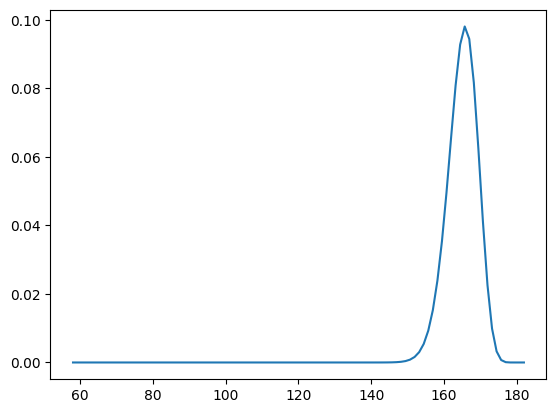

In [60]:
min_val, max_val, avg, N = df_gym.iloc[5]['Resting_BPM'], df_gym.iloc[5]['Max_BPM'], df_gym.iloc[5]['Avg_BPM'], math.trunc(df_gym.iloc[5]['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max_val - avg)
print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
genarated_heart_rates_truncnorm = genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N)

print("Using truncated normal distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_truncnorm, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_truncnorm):.2f}")
genarated_heart_rates_beta = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

print("\n\nUsing beta distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_beta):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_beta, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_beta):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_beta):.2f}")


In [128]:
random_indices = np.random.RandomState(RANDOM_STATE).randint(0, df_gym.shape[0], 10)
print(random_indices)

[ 13 162 227 183 138 184  99  18 205 116]


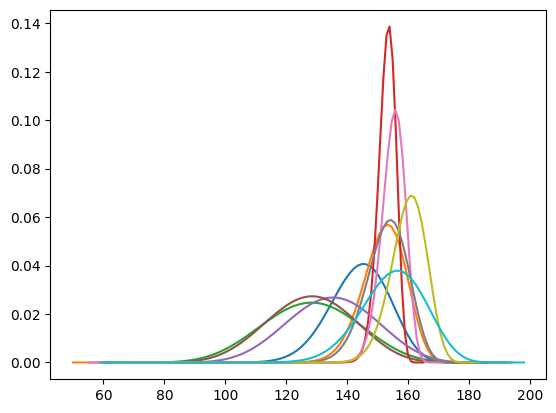

In [129]:
for index, row in df_gym.iloc[random_indices].iterrows():
    min_val, max_val, avg, N = row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60)
    std = mean_std_ratio_avg_max * (max_val - avg)
    
    try:
        genarated_heart_rates_session = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

        # print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
        
        # print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
        # print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
        # print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
        # print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

        # print('\n')
    except Exception as e:
        print(f"Error for index {index}: {e}")
        continue


#### Data generation

In [130]:
def generate_heart_rates(min_val, max_val, avg, N, std_ratio):
    std = std_ratio * (max_val - avg)
    try:
        return genarate_heart_rates_beta(min_val, max_val, avg, std, N, False)
    
    except Exception as e:
        return None

In [131]:
clients_heart_rates = []
valid_indexes = []
user_final_id = 0

for index, row in df_gym.iterrows():
    heart_rates = generate_heart_rates(row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60), mean_std_ratio_avg_max)
    
    if heart_rates is not None:
        for hr in heart_rates:
            clients_heart_rates.append({
                'User_ID': user_final_id,
                'Heart_Rate': int(hr)
            })
        valid_indexes.append(index)
        user_final_id += 1

df_pulses = pd.DataFrame(clients_heart_rates)
df_gym_members_with_hr = df_gym.loc[valid_indexes].reset_index(drop=True)

C:\Users\danih\AppData\Local\Temp\ipykernel_9436\4136777182.py:10: RuntimeWarning: invalid value encountered in scalar divide
  alpha = ((1-mean_std) / var_std  - 1/mean_std) * mean_std**2


In [ ]:
df_pulses.to_csv('data/gym_members_heart_rates.csv', index=False)
df_gym_members_with_hr.to_csv('data/modified_gym_members_exercise_tracking.csv', index=False)

# Stage 2

In [24]:
df_users_raw = pd.read_csv('data/Million Song Dataset kaggle/User Listening History.csv')
df_music = pd.read_csv('data/Million Song Dataset kaggle/Music Info.csv')

We only take into account users that have listened to at least 10 songs

In [25]:
df_user_counts = df_users_raw['user_id'].value_counts().reset_index()
df_user_counts.columns = ['user_id', 'count']

In [26]:
df_users = df_users_raw[df_users_raw['user_id'].isin(df_user_counts[df_user_counts['count'] > 5]['user_id'])].reset_index(drop=True)
df_users.shape

(8332242, 3)

In [27]:
df_users

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
...,...,...,...
8332237,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332238,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332239,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332240,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1


In [28]:
df_users.to_csv('data/User Listening History_modified.csv', index=False)

# Web app

To reduce file size, we will only store the music history of an amount of people equal to the amount of people we have heart data of, which are the people who did a cardio session

In [ ]:
df_gym_members_with_hr = pd.read_csv('data/modified_gym_members_exercise_tracking.csv')

In [135]:
df_users = pd.read_csv('data/User Listening History_modified.csv')

In [136]:
df_users['user_id'].unique().shape[0]

464573

In [137]:
first_250_users = df_users['user_id'].unique()[:len(df_gym_members_with_hr)]
df_users_reduced = df_users[df_users['user_id'].isin(first_250_users)].reset_index(drop=True)

In [ ]:
df_users_reduced.to_csv('data/User Listening History_reduced.csv', index=False)